# Introduction

## Train Multiple Models

Now that we have done feature engineering on the dataset, the next step is to train the data on different regression models.
The models we will be using are the following:
- **Linear Regression**
- **Decision Tree**
- **Adaboost Regressor**
- **Random Forest**

For each model, there will be a training and parameter tuning phase, and a predictions phase.
Results of the predictions are then plotted and visualized.

# Setup
Let us import the required modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
from math import sqrt
import matplotlib.pyplot as plt
import joblib
import pickle

import project.src.feat_eng as fe
import project.src.visualization as viz
import project.src.evaluation as eva

import sklearn.model_selection as modsel
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline
sys.path.insert(0, os.path.abspath("../../"))
color = sns.color_palette()
pd.set_option("display.max_columns", 100) #

RNDSTATE = 30

## Load Data
Note that the dataset is already split into Train-Test sets.

In [2]:
engineered_dataset = fe.TrainTestSplit.from_csv_directory(dir_path="../data/lvl4_rfecv")

In [3]:
engineered_dataset.x_train.info()
engineered_dataset.y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62090 entries, 0 to 62089
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   62090 non-null  float64
 1   bedroomcnt                    62090 non-null  float64
 2   fireplacecnt                  62090 non-null  float64
 3   garagecarcnt                  62090 non-null  float64
 4   latitude                      62090 non-null  float64
 5   longitude                     62090 non-null  float64
 6   poolcnt                       62090 non-null  float64
 7   roomcnt                       62090 non-null  float64
 8   threequarterbathnbr           62090 non-null  float64
 9   unitcnt                       62090 non-null  float64
 10  numberofstories               62090 non-null  float64
 11  house_age                     62090 non-null  float64
 12  airconditioningtypeid_1.0     62090 non-null  float64
 13  b

array([-0.04060104,  0.00803361,  0.04714126, ..., -0.02798657,
        0.03477351,  0.00171659])

# Linear Regression Model

-------SCRIVERE QUALCOSA----------------

Linear Regression: Plain linear regression that minimizes the Mean Squared Error(MSE) cost function.

The model RMSE is significantly higher than MAE which suggests that the outliers are affecting the model's performance as RMSE punishes the model more for mispredicting outliers.
The K-Fold Cross Validation shows that the model's performance is highly volatile

In [4]:
linear_reg = LinearRegression()
linear_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

LinearRegression()

In [5]:
linreg_train_pred = linear_reg.predict(engineered_dataset.x_train)
linreg_test_pred = linear_reg.predict(engineered_dataset.x_test)

linreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=linreg_train_pred)
linreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=linreg_test_pred)

In [6]:
print("Training:")
linreg_train_eval.print_eval()
print("Testing:")
linreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07041153246114866
Mean Squared Error : 0.028827755428801553
Root Mean Squared Error : 0.1697873830082835

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.0721586173392606
Mean Squared Error : 0.030189761313624365
Root Mean Squared Error : 0.17375201096282128



In [7]:
lr_model = eva.EvaluatedModel(linear_reg, train_eval=linreg_train_eval, test_eval=linreg_test_eval)

# Decision Tree Regression Model

-------SCRIVERE QUALCOSA----------------

Decision Tree: Powerful model capable of finding complex nonlinear relationships in the data.
Random Forest: Train many Decision Tress on random subsets of the features via the bagging method (Ensemble Learning).

In [13]:
# automatic parameters tuning
dt=DecisionTreeRegressor(random_state=RNDSTATE)
properties={
            'min_samples_leaf':[x for x in range(2,251,2)],
            'max_leaf_nodes':[x for x in range(2,51,2)],
            'max_features': ["sqrt", "log2"]
            }

tuned_dt=GridSearchCV(dt,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=2,n_jobs=-1)
tuned_dt.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_dt.best_score_) )
print ("Best Params: ", tuned_dt.best_params_)

Fitting 5 folds for each of 6250 candidates, totalling 31250 fits
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=2; total time=   0.2s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=4; total time=   0.2s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=6; total time=   0.2s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=8; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=10; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=12; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=12; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=sqrt, max_leaf_nodes=2, min_samples_leaf=18; total time= 

In [14]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_dt, '../../tuned_models/dectree_tuning_results.pkl')

['../../tuned_models/dectree_tuning_results.pkl']

In [8]:
# to load previously saved results
tuned_dt = joblib.load("../../tuned_models/dectree_tuning_results.pkl")

In [9]:
print(tuned_dt.cv_results_)
tuned_dt_results = pd.DataFrame( tuned_dt.cv_results_ )

{'mean_fit_time': array([0.1609551 , 0.14577188, 0.12597051, ..., 0.19744368, 0.28712368,
       0.26192627]), 'std_fit_time': array([0.02996537, 0.01828229, 0.02142953, ..., 0.08146761, 0.05182752,
       0.09736596]), 'mean_score_time': array([0.00996442, 0.01900754, 0.01394172, ..., 0.02358508, 0.02061849,
       0.00906968]), 'std_score_time': array([0.00960627, 0.00934228, 0.00782639, ..., 0.02055245, 0.02549226,
       0.00599626]), 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_leaf_nodes': masked_array(data=[2, 2, 2, ..., 50, 50, 50],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[2, 4, 6, ..., 246, 248, 250],
             mask=[False, False, False, ..., False, False, False],
       fill_valu

In [10]:
tuned_dt_results[["mean_test_score","mean_train_score"]]

mean_test_score  mean_train_score
0           -0.028965         -0.028885
1           -0.028965         -0.028885
2           -0.028965         -0.028885
3           -0.028965         -0.028885
4           -0.028965         -0.028885
...               ...               ...
6245        -0.028988         -0.028698
6246        -0.028987         -0.028698
6247        -0.028995         -0.028691
6248        -0.028981         -0.028697
6249        -0.028974         -0.028693

[6250 rows x 2 columns]

In [11]:
print(tuned_dt.best_estimator_)
print(tuned_dt.best_score_)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=6,
                      min_samples_leaf=228, random_state=30)
-0.028891499864951785


In [12]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_dt.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028837933699217402


In [13]:
# best parameters from automatic parameters tuning
tree_reg = DecisionTreeRegressor(**tuned_dt.best_params_)
tree_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=6,
                      min_samples_leaf=228)

In [14]:
dtreg_train_pred = tree_reg.predict(engineered_dataset.x_train)
dtreg_test_pred = tree_reg.predict(engineered_dataset.x_test)

dtreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=dtreg_train_pred)
dtreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=dtreg_test_pred)

In [15]:
print("Training:")
dtreg_train_eval.print_eval()
print("Testing:")
dtreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07038642304342774
Mean Squared Error : 0.028867878399114703
Root Mean Squared Error : 0.1699054984369685

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07213999449867912
Mean Squared Error : 0.030195777506214348
Root Mean Squared Error : 0.1737693226844553



In [16]:
dtr_model = eva.EvaluatedModel(tree_reg, train_eval=dtreg_train_eval, test_eval=dtreg_test_eval)

# AdaBoost Regression Model

-------------DA FARE BENE-----------
vedere notebook lezione su che parametri ci sono da tunare perche lotto lo fa

In [84]:
# automatic parameters tuning
abreg=AdaBoostRegressor(random_state=RNDSTATE)
properties={
    'base_estimator':[tree_reg],
    'n_estimators':[x for x in range(1,50,2)],
    'learning_rate':[0.001,0.01,0.1,1,10,100]
}

tuned_abreg=GridSearchCV(abreg,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=4,n_jobs=-1)
tuned_abreg.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_abreg.best_score_) )
print ("Best Params: ", tuned_abreg.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=6; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=6; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=10; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=10; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=12; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=14; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=16; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=18; total time=   0.2s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=18; total time=   0.1s
[CV] END max_features=log2, max_leaf_nodes=46, min_samples_leaf=22; t

In [85]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_abreg, '../../tuned_models/adaboost_tuning_results.pkl')

['../../tuned_models/adaboost_tuning_results.pkl']

In [17]:
# to load previously saved results
tuned_abreg = joblib.load("../../tuned_models/adaboost_tuning_results.pkl")

In [18]:
print(tuned_abreg.cv_results_)
tuned_abreg_results = pd.DataFrame( tuned_abreg.cv_results_ )

{'mean_fit_time': array([0.15940957, 0.35163865, 0.56928492, 1.57303262, 2.29171615,
       1.67224679, 2.09967132, 3.0315249 , 3.06097922, 5.18926067,
       6.96911221, 5.30459924, 6.38320808, 3.70532923, 3.67236052,
       4.25988922, 4.00112228, 3.86032262, 4.42720327, 4.52056894,
       4.8555666 , 5.24229445, 5.44544282, 5.40931563, 5.62443056,
       0.13798761, 0.39922256, 0.68121686, 0.80511031, 0.97674236,
       1.30428219, 1.68239274, 1.751053  , 1.77959809, 2.41863661,
       2.30933614, 2.8271945 , 3.05860939, 3.5029356 , 3.14432411,
       3.79089866, 4.13584237, 5.69630809, 4.60515242, 4.56333799,
       5.26325979, 5.01982465, 6.20661588, 5.90951862, 5.72163529,
       0.19029779, 0.37859435, 0.67703924, 1.00878448, 1.60031519,
       1.48199496, 1.39870219, 1.63109331, 2.22465529, 2.16405826,
       5.39346638, 6.17613878, 5.49562922, 6.80243969, 4.99677358,
       3.74513502, 4.10830197, 4.18002362, 4.21201105, 4.73722391,
       4.76126337, 5.1984231 , 4.99637213, 6

In [19]:
tuned_abreg_results[["param_n_estimators","mean_test_score","mean_train_score"]]

param_n_estimators  mean_test_score  mean_train_score
0                    1        -0.028979         -0.028905
1                    3        -0.028906         -0.028852
2                    5        -0.028888         -0.028853
3                    7        -0.028888         -0.028843
4                    9        -0.028887         -0.028840
..                 ...              ...               ...
145                 41        -3.271964         -3.272051
146                 43        -3.271964         -3.272051
147                 45        -3.271964         -3.272051
148                 47        -3.271964         -3.272051
149                 49        -3.271964         -3.272051

[150 rows x 3 columns]

In [20]:
print(tuned_abreg.best_estimator_)
print(tuned_abreg.best_score_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='sqrt',
                                                       max_leaf_nodes=6,
                                                       min_samples_leaf=228),
                  learning_rate=0.001, n_estimators=25, random_state=30)
-0.02888395680192074


In [21]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_abreg.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028862077999012446


In [22]:
# best parameters from automatic parameters tuning
adaboost_reg = AdaBoostRegressor(**tuned_abreg.best_params_)
adaboost_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='sqrt',
                                                       max_leaf_nodes=6,
                                                       min_samples_leaf=228),
                  learning_rate=0.001, n_estimators=25)

In [23]:
adaboostreg_train_pred = adaboost_reg.predict(engineered_dataset.x_train)
adaboostreg_test_pred = adaboost_reg.predict(engineered_dataset.x_test)

adaboostreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=adaboostreg_train_pred)
adaboostreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=adaboostreg_test_pred)

In [24]:
print("Training:")
adaboostreg_train_eval.print_eval()
print("Testing:")
adaboostreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.0698786241805803
Mean Squared Error : 0.028846971107305483
Root Mean Squared Error : 0.16984396105633395

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.07160642028390239
Mean Squared Error : 0.030194332130963706
Root Mean Squared Error : 0.17376516374395562



In [25]:
abr_model = eva.EvaluatedModel(adaboost_reg, train_eval=adaboostreg_train_eval, test_eval=adaboostreg_test_eval)

# Random Forest Regression Model

-------SCRIVERE QUALCOSA----------------

fare GridSearchCV per il tuning di parametri cosi ho un motivo per cui sto usando certi parametri

uso parametri trovati per decision tree

In [19]:
# automatic parameters tuning
rfreg=RandomForestRegressor(random_state=RNDSTATE)
properties={
    "n_estimators": [x for x in range(50,251,50)],
    "min_samples_leaf": [x for x in range(180,251,7)],
    "max_leaf_nodes": [x for x in range(14,71,14)],
    "max_features": ["sqrt"]
}

tuned_rfreg=GridSearchCV(rfreg,properties,scoring="neg_mean_squared_error",cv=5,return_train_score=True,verbose=4,n_jobs=-1)
tuned_rfreg.fit(engineered_dataset.x_train,engineered_dataset.y_train)

print ("Best Score: {:.3f}".format(tuned_rfreg.best_score_) )
print ("Best Params: ", tuned_rfreg.best_params_)

Fitting 5 folds for each of 275 candidates, totalling 1375 fits
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=50;, score=(train=-0.028, test=-0.030) total time=   9.5s
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=100;, score=(train=-0.028, test=-0.030) total time=  17.9s
[CV 5/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=100;, score=(train=-0.029, test=-0.029) total time=  19.3s
[CV 4/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=150;, score=(train=-0.029, test=-0.030) total time=  22.5s
[CV 3/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=200;, score=(train=-0.029, test=-0.027) total time=  27.3s
[CV 2/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf=180, n_estimators=250;, score=(train=-0.029, test=-0.027) total time=  31.3s
[CV 1/5] END max_features=sqrt, max_leaf_nodes=14, min_samples_leaf

In [94]:
# save results
# if not os.path.exists('../../tuned_models'):
#     os.mkdir('../../tuned_models')
# joblib.dump(tuned_rfreg, '../../tuned_models/randforest_tuning_results.pkl')

['../../tuned_models/randforest_tuning_results.pkl']

In [26]:
# to load previously saved results
tuned_rfreg = joblib.load("../../tuned_models/randforest_tuning_results.pkl")

In [27]:
print(tuned_rfreg.cv_results_)
tuned_rfreg_results = pd.DataFrame( tuned_rfreg.cv_results_ )

{'mean_fit_time': array([ 9.47909679, 18.04069352, 24.69227419, 25.97859106, 31.73114924,
        6.31311083, 12.74888687, 17.31801357, 24.73737283, 36.24359202,
        7.80755196, 16.61648455, 26.99143677, 27.7211915 , 40.138515  ,
        7.2412734 , 14.98957548, 18.21076488, 28.62794123, 39.28791614,
        8.68259368, 13.32124362, 20.03441467, 27.78817477, 35.55612602,
        6.28777833, 16.34725375, 25.04945636, 31.82090964, 38.60272856,
        9.19957881, 15.81195216, 18.11464701, 31.7199214 , 37.12913456,
        6.68262987, 17.80455823, 23.32400799, 33.47026596, 42.22273488,
        8.49761715, 11.90050192, 16.35446973, 32.54710369, 37.45405293,
        7.36069236, 13.26392603, 28.46114821, 33.93642955, 43.91334925,
       11.69853287, 17.3264214 , 22.46759949, 30.27936039, 37.88884139,
       10.56966772, 20.83272491, 31.52619252, 40.35232844, 43.41459928,
        9.68335662, 21.48181162, 30.14992862, 32.12362485, 47.11560082,
       10.35221739, 21.94795637, 26.38767638, 

In [28]:
tuned_rfreg_results[["param_n_estimators","mean_test_score","mean_train_score"]]

param_n_estimators  mean_test_score  mean_train_score
0                   50        -0.028838         -0.028708
1                  100        -0.028832         -0.028704
2                  150        -0.028835         -0.028701
3                  200        -0.028837         -0.028702
4                  250        -0.028837         -0.028702
..                 ...              ...               ...
270                 50        -0.028798         -0.028484
271                100        -0.028789         -0.028481
272                150        -0.028795         -0.028480
273                200        -0.028783         -0.028479
274                250        -0.028789         -0.028481

[275 rows x 3 columns]

In [29]:
print(tuned_rfreg.best_estimator_)
print(tuned_rfreg.best_score_)

RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)
-0.02878311305984198


In [30]:
test_acc = mean_squared_error(y_true = engineered_dataset.y_train,
                          y_pred = tuned_rfreg.predict(engineered_dataset.x_train) )
print ("Train Accuracy: {}".format(test_acc) )

Train Accuracy: 0.028502289288850676


In [31]:
# best parameters from automatic parameters tuning
forest_reg = RandomForestRegressor(**tuned_rfreg.best_params_)
forest_reg.fit(engineered_dataset.x_train, engineered_dataset.y_train)

RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)

In [32]:
rfreg_train_pred = forest_reg.predict(engineered_dataset.x_train)
rfreg_test_pred = forest_reg.predict(engineered_dataset.x_test)

rfreg_train_eval = eva.Evaluation(y_real=engineered_dataset.y_train, y_pred=rfreg_train_pred)
rfreg_test_eval = eva.Evaluation(y_real=engineered_dataset.y_test, y_pred=rfreg_test_pred)

In [33]:
print("Training:")
rfreg_train_eval.print_eval()
print("Testing:")
rfreg_test_eval.print_eval()

Training:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.06979816921870939
Mean Squared Error : 0.028504641770174477
Root Mean Squared Error : 0.16883317733838477

Testing:
--------------Model Evaluations:--------------
Mean Absolute Error : 0.0717759589051083
Mean Squared Error : 0.030049128469394438
Root Mean Squared Error : 0.17334684441718123



In [34]:
rfr_model = eva.EvaluatedModel(forest_reg, train_eval=rfreg_train_eval, test_eval=rfreg_test_eval)

# Performance Visualization

### Setup

In [35]:
def rank_model(is_test: bool):
    # ranking based on mse
    models=[lr_model, dtr_model, abr_model, rfr_model]
    min_mse=None

    for i,m in enumerate(models):
        if is_test:
            if i==0:
                min_mse=m
            if min_mse.test_eval.mse > m.test_eval.mse:
                min_mse=m
        else:
            if i==0:
                min_mse=m
            if min_mse.train_eval.mse > m.train_eval.mse:
                min_mse=m

    return min_mse.model

In [36]:
def get_performance_df(results: dict[str, list[eva.EvaluatedModel]]):
    perf_records = []
    for model_name, evalu in results.items():
        record = {
            "model": model_name,
            "MAE": evalu.mae,
            "MSE": evalu.mse,
            "RMSE": evalu.rmse
        }
        perf_records.append(record)

    return pd.DataFrame.from_records(data=perf_records)

In [37]:
def performance_plot(performance_df: pd.DataFrame):
    sns.set(rc={"figure.figsize":(8, 4)})
    plot = sns.lineplot(data=performance_df, x="model", y="MSE", hue="model",style="model", palette="bright", markers=True)
    plot.tick_params(axis="x", rotation=90)

    return plot

In [38]:
# all results
train_evals = {
    "[Training] Linear Regression": lr_model.train_eval,
    "[Training] Decision Tree Regression": dtr_model.train_eval,
    "[Training] AdaBoost Regression": abr_model.train_eval,
    "[Training] Random Forest Regression": rfr_model.train_eval
}

test_evals = {
    "[Testing] Linear Regression": lr_model.test_eval,
    "[Testing] Decision Tree Regression": dtr_model.test_eval,
    "[Testing] AdaBoost Regression": abr_model.test_eval,
    "[Testing] Random Forest Regression": rfr_model.test_eval
}

## Best Performing Model

In [39]:
print("Best Model on Test: ", rank_model(is_test=True))

Best Model on Test:  RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)


In [40]:
print("Best Model on Train: ", rank_model(is_test=False))

Best Model on Train:  RandomForestRegressor(max_features='sqrt', max_leaf_nodes=70,
                      min_samples_leaf=250, n_estimators=200)


## Training

In [41]:
train_performance_df = get_performance_df(train_evals)
train_performance_df

model       MAE       MSE      RMSE
0         [Training] Linear Regression  0.070412  0.028828  0.169787
1  [Training] Decision Tree Regression  0.070386  0.028868  0.169905
2       [Training] AdaBoost Regression  0.069879  0.028847  0.169844
3  [Training] Random Forest Regression  0.069798  0.028505  0.168833

<AxesSubplot:xlabel='model', ylabel='MSE'>

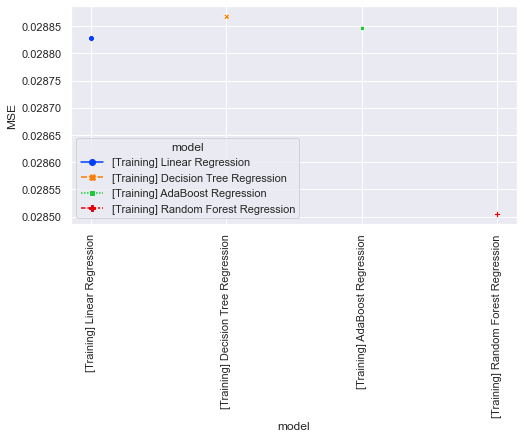

In [42]:
performance_plot(train_performance_df)

## Testing

In [43]:
test_performance_df = get_performance_df(test_evals)
test_performance_df

model       MAE       MSE      RMSE
0         [Testing] Linear Regression  0.072159  0.030190  0.173752
1  [Testing] Decision Tree Regression  0.072140  0.030196  0.173769
2       [Testing] AdaBoost Regression  0.071606  0.030194  0.173765
3  [Testing] Random Forest Regression  0.071776  0.030049  0.173347

<AxesSubplot:xlabel='model', ylabel='MSE'>

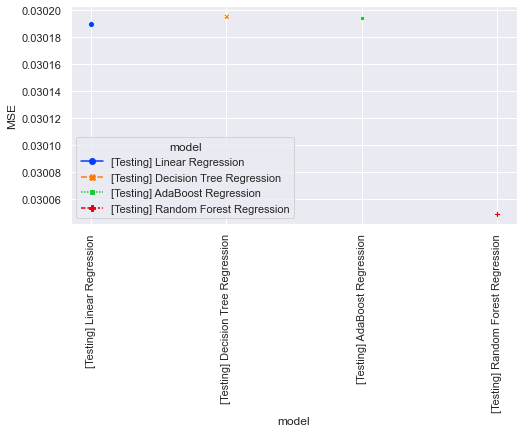

In [44]:
performance_plot(test_performance_df)

## Training vs Testing

In [45]:
train_test_perf_df = pd.concat([train_performance_df, test_performance_df]).reset_index(drop=True)
train_test_perf_df

model       MAE       MSE      RMSE
0         [Training] Linear Regression  0.070412  0.028828  0.169787
1  [Training] Decision Tree Regression  0.070386  0.028868  0.169905
2       [Training] AdaBoost Regression  0.069879  0.028847  0.169844
3  [Training] Random Forest Regression  0.069798  0.028505  0.168833
4          [Testing] Linear Regression  0.072159  0.030190  0.173752
5   [Testing] Decision Tree Regression  0.072140  0.030196  0.173769
6        [Testing] AdaBoost Regression  0.071606  0.030194  0.173765
7   [Testing] Random Forest Regression  0.071776  0.030049  0.173347

<AxesSubplot:xlabel='model', ylabel='MSE'>

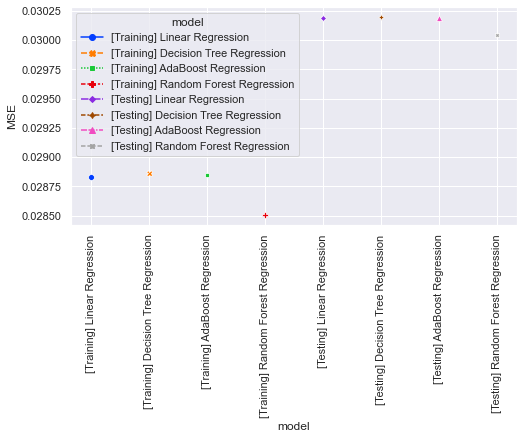

In [46]:
performance_plot(train_test_perf_df)

### Setup

In [47]:
def plot_features_predictions(evaluated: eva.EvaluatedModel):
    viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                              y_var=("Model predictions", pd.Series(evaluated.test_eval.y_pred)),
                              subplot_size=(5, 4),
                              width=3,
                              scatter_kwargs={"alpha": 0.8})

def plot_features_residuals(evaluation: eva.EvaluatedModel):
    viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                              y_var=("Model residuals", pd.Series(evaluation.test_eval.y_real - evaluation.test_eval.y_pred)),
                              subplot_size=(5, 4),
                              width=3,
                              scatter_kwargs={"alpha": 0.8})

## Predictions and Residuals

In this section, for each combination of model and testing set, 2 types of plots will be shown:
- Features vs model predictions;
- Features vs model residuals.

Here the goal is to understand how the models make their predictions and get a general idea of where and how wrong they are.

### Linear Regression

In [ ]:
plot_features_predictions(lr_model)

In [ ]:
plot_features_residuals(lr_model)

### Decision Tree Regression

In [ ]:
plot_features_predictions(dtr_model)

In [ ]:
plot_features_residuals(dtr_model)

### AdaBoost Regression

In [ ]:
plot_features_predictions(abr_model)

In [ ]:
plot_features_residuals(abr_model)

### Random Forest Regression

In [ ]:
plot_features_predictions(rfr_model)

In [ ]:
plot_features_residuals(rfr_model)

### A Look at the Expected Value and Variance of True log-errors

The expected value of both training and testing sets' targets is shown to provide a better context around the previously plotted predictions. We can see that the expected value is around 0.017, which is very close to what the models are predicting: in other words, the models seem to be predicting values around the average of the true log-errors with relatively little variance.

A look at the variance of true log-errors also gives an idea as to why the testing sets perform much better than the training ones: since all the models seem to predict the average log-error, or very close to it, for each instance, error is expected to be directly proportional with the variance of the target of each set. The variance of the testing set is, in fact, lower than the training set one, most likely because its size is smaller.

In [48]:
# Since all y_train and y_test are equal, the dataset from which they are extracted
# does not matter
y_train = engineered_dataset.y_train
y_test = engineered_dataset.y_test

pd.DataFrame(data={
    "Set": ["Training", "Testing"],
    "Expected value": [y_train.mean(), y_test.mean()],
    "Variance": [y_train.var(), y_test.var()]
})

Set  Expected value  Variance
0  Training        0.016773  0.028937
1   Testing        0.016685  0.030262

### Setup

In [49]:
def get_full_df(evaluated: eva.EvaluatedModel):
    full_df_test = engineered_dataset.x_test.copy()
    full_df_test["model predictions"] = evaluated.test_eval.y_pred
    full_df_test["real predictions"] = evaluated.test_eval.y_real
    full_df_test["residuals"] = evaluated.test_eval.y_real - evaluated.test_eval.y_pred

    return full_df_test

def get_extreme_instances(evaluated: eva.EvaluatedModel):
    df = get_full_df(evaluated=evaluated)
    highest_error = df[df["residuals"] >= df["residuals"]]
    lowest_error = df[df["residuals"] <= df["residuals"]]

    return highest_error,lowest_error

In [60]:
def plot_extreme_instances_on_distribution(evaluated: eva.EvaluatedModel, var, cat):
    fig, axs = viz.plot_feature_distribution(data=engineered_dataset.x_test,var=var,subplot_size=(5, 4),cat = cat)
    most_wrong, most_correct = get_extreme_instances(evaluated=evaluated)

    for ax in axs.flatten():
        feature_name = ax.get_xlabel()
        if feature_name != "":
            x_worst = most_wrong[feature_name].values
            x_best = most_correct[feature_name].values

            # Points are drawn at mid height + an offset so they don't overlap
            y_min, y_max = ax.get_ylim()
            height = (abs(y_max) - abs(y_min))
            half_height = height / 2

            # Heights of worst and best on two different levels
            y_worst_height = half_height + 1
            y_best_height = half_height + 2

            # Also add gaussian noise to mitigate overlapping with the violin/box plot
            y_worst = [y_worst_height + np.random.normal(0, 0.05) for _ in range(len(x_worst))]
            y_best = [y_best_height + np.random.normal(0, 0.05) for _ in range(len(x_best))]

            # Plot the most wrong/correct values over the distribution plots
            # and assign them size in proportion to their wrongness/correctness
            worst_size = 50 * ((np.argsort(most_wrong["residuals"].values) + 1) / len(x_worst))
            best_size = 50 * ((np.argsort(-most_correct["residuals"].values) + 1) / len(x_best))

            ax.scatter(x=x_worst, y=y_worst, s=worst_size, c='red')
            ax.scatter(x=x_best, y=y_best, s=best_size, c='cyan')

    return fig, axs

In [61]:
def plot_extreme_instances_on_feature_vs_target(evaluated: eva.EvaluatedModel):
    fig, axs = viz.bivariate_feature_plot(data=engineered_dataset.x_test, mode="scatter",
                                          y_var=("Real logerror", pd.Series(engineered_dataset.y_test)),
                                          subplot_size=(5, 4),
                                          scatter_kwargs={"alpha": 0.65})

    most_wrong, most_correct = get_extreme_instances(evaluated=evaluated)
    for ax in axs.flatten():
        feature_name = ax.get_xlabel()
        if feature_name != "":
            x_worst = most_wrong[feature_name].values
            x_best = most_correct[feature_name].values

            y_worst = most_wrong["real predictions"].values
            y_best = most_correct["real predictions"].values

            # Plot the most wrong/correct values over the distribution plots
            # and assign them size in proportion to their wrongness/correctness
            worst_size = 80 * ((np.argsort(most_wrong["residuals"].values) + 1) / len(x_worst))
            best_size = 80 * ((np.argsort(-most_correct["residuals"].values) + 1) / len(x_best))

            ax.scatter(x=x_worst, y=y_worst, s=worst_size, c='red')
            ax.scatter(x=x_best, y=y_best, s=best_size, c='cyan')

    return fig, axs

## Best and Worst Instances

In this section, for each combination of model and testing set, 2 types of plots will be shown:
- Distribution of extreme instances (in terms of predictions) vs actual feature distribution;
- Dataset features and extreme instances vs true logerror.

Both plots' goal is to help me understand if there is some peculiarity in the distribution and predictions of the most wrongly/correctly predicted instances.

In [62]:
num_vars_rfecv = [var for var in engineered_dataset.x_test.columns if len(engineered_dataset.x_test[var].unique()) > 10]
cat_vars_rfecv = [var for var in engineered_dataset.x_test.columns if var not in num_vars_rfecv]

### Linear Regression

(<Figure size 1800x864 with 15 Axes>,
 array([[<AxesSubplot:xlabel='bathroomcnt'>,
         <AxesSubplot:xlabel='bedroomcnt'>,
         <AxesSubplot:xlabel='latitude'>,
         <AxesSubplot:xlabel='longitude'>, <AxesSubplot:xlabel='roomcnt'>],
        [<AxesSubplot:xlabel='house_age'>,
         <AxesSubplot:xlabel='calculatedfinishedsquarefeet'>,
         <AxesSubplot:xlabel='garagetotalsqft'>,
         <AxesSubplot:xlabel='lotsizesquarefeet'>,
         <AxesSubplot:xlabel='landtaxvaluedollarcnt'>],
        [<AxesSubplot:xlabel='structuretaxvaluedollarcnt'>,
         <AxesSubplot:xlabel='yardbuildingsqft17'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

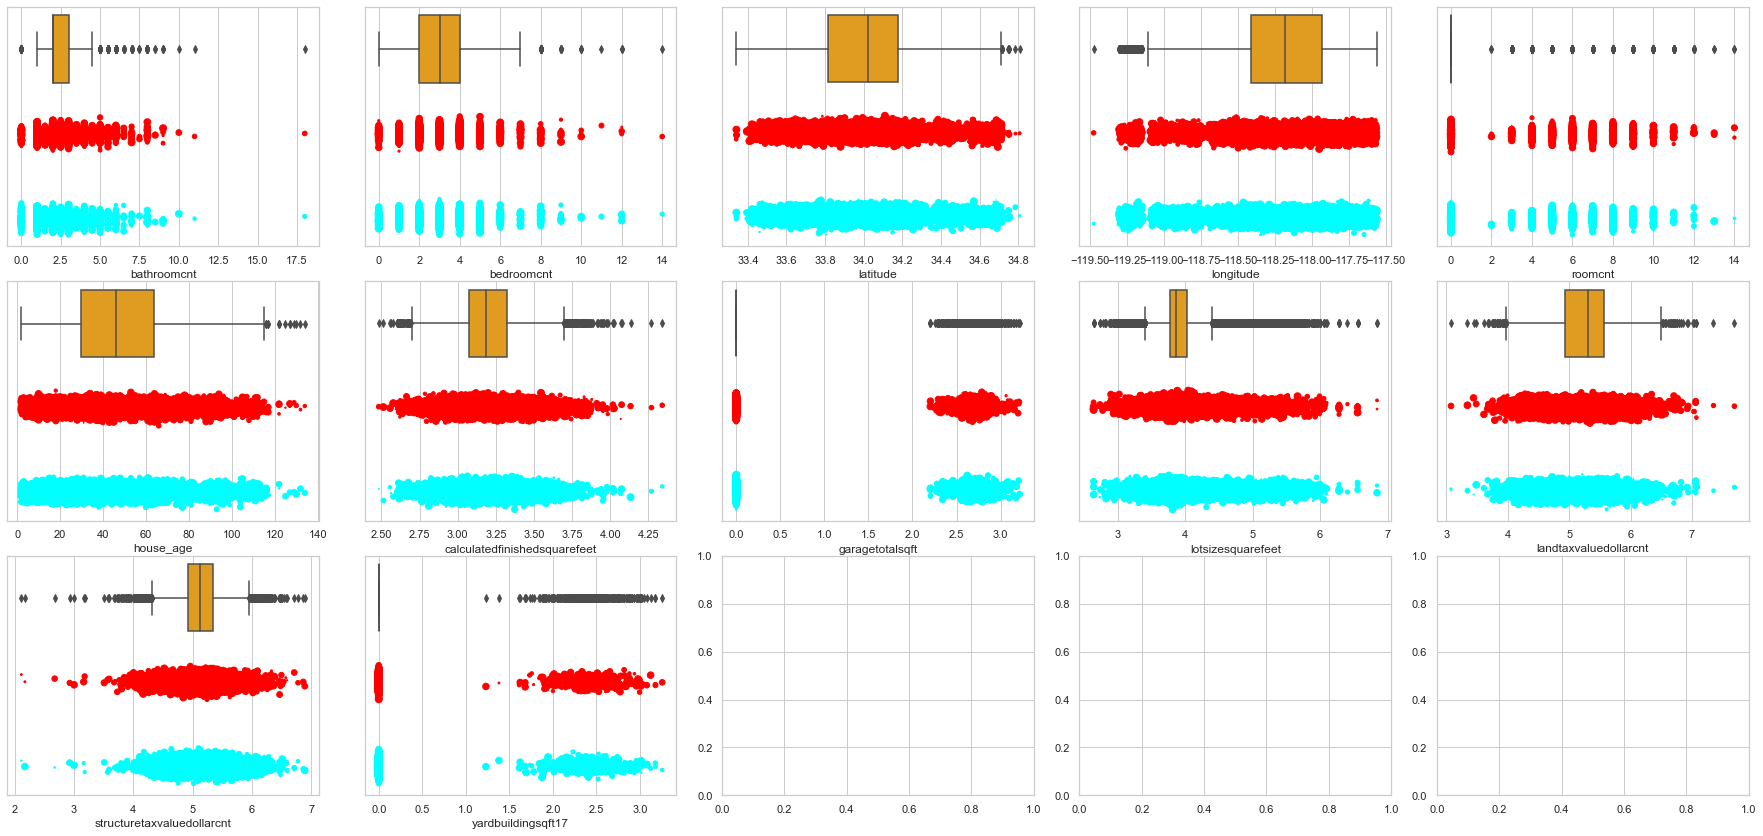

In [63]:
plot_extreme_instances_on_distribution(lr_model,num_vars_rfecv,cat = False)

(<Figure size 1800x864 with 15 Axes>,
 array([[<AxesSubplot:xlabel='fireplacecnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='garagecarcnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='poolcnt', ylabel='frequency'>,
         <AxesSubplot:xlabel='threequarterbathnbr', ylabel='frequency'>,
         <AxesSubplot:xlabel='unitcnt', ylabel='frequency'>],
        [<AxesSubplot:xlabel='numberofstories', ylabel='frequency'>,
         <AxesSubplot:xlabel='airconditioningtypeid_1.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='buildingqualitytypeid_11.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='heatingorsystemtypeid_2.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='heatingorsystemtypeid_24.0', ylabel='frequency'>],
        [<AxesSubplot:xlabel='heatingorsystemtypeid_7.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='propertylandusetypeid_261.0', ylabel='frequency'>,
         <AxesSubplot:xlabel='propertylandusetypeid_266.0', ylabel='frequency'>,
     

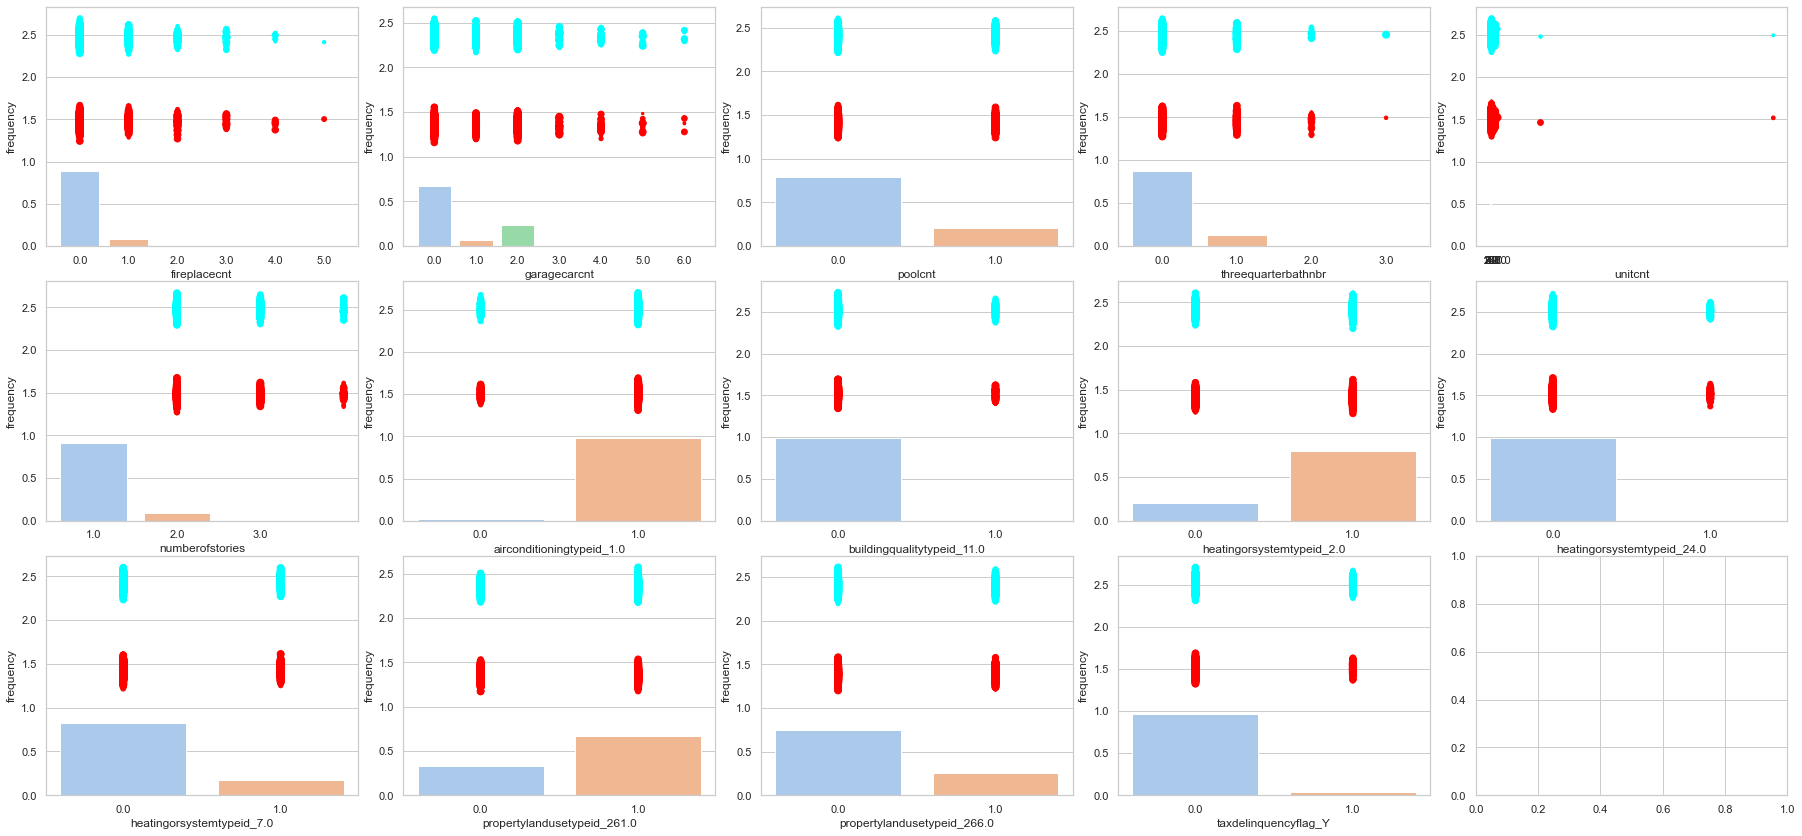

In [64]:
plot_extreme_instances_on_distribution(lr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(lr_model)

(<Figure size 1080x2592 with 27 Axes>,
 array([[<AxesSubplot:xlabel='bathroomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='bedroomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='fireplacecnt', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='garagecarcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='latitude', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='longitude', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='poolcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='roomcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='threequarterbathnbr', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='unitcnt', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='numberofstories', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='house_age', ylabel='Real logerror'>],
        [<AxesSubplot:xlabel='airconditioningtypeid_1.0', ylabel='Real logerror'>,
         <AxesSubplot:xlabel='buildingqualitytypeid_

### Decision Tree Regression

In [ ]:
plot_extreme_instances_on_distribution(dtr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(dtr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(dtr_model)

### AdaBoost Regression

In [ ]:
plot_extreme_instances_on_distribution(abr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(abr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(abr_model)

### Random Forest Regression

In [ ]:
plot_extreme_instances_on_distribution(rfr_model,num_vars_rfecv,cat = False)

In [ ]:
plot_extreme_instances_on_distribution(rfr_model,cat_vars_rfecv,cat = True)

In [ ]:
plot_extreme_instances_on_feature_vs_target(rfr_model)

quello che fa lotto è di mostrare li istanze: feature, log error, predizione, mse, solo per il modello migliore
migliori, peggiori, e il resto, ma non mi serve il resto
poi li plotta (feature vs label)
poi plotta predizioni vs label

----------------------- DA NOTEBOOK CRASTO -----------------------

## Model Evaluation

### Baseline Metrics

It is important to set a baseline for the model's performance to compare different algorithms. For regression problems, the baseline metrics are calculated by replacing $y'$ with $\bar{y}$. Using this, the different baseline regression metrics are:

- **MSE Baseline**: Variance of the target variable (Mean Squared Error)
- **RMSE Baseline**: Standard Deviation of the target variable (Root Mean Squared Error)
- **MAE Baseline**: Average Abolsute Deviation of the target variable (Mean Absolute Error)
- **R2 Baseline**: 0

For this regression problem, we will use the models' **Mean Absolute Error** and **RMSE (Root Mean Squared Error)** to compare the different algorithms which have **baseline values of 0.533 and 0.0837** respectively.

We will also observe the RMSE as another evaluation metric which punishes more for outliers than MAE.

In [ ]:
# Baseline for RMSE
print(f"MAE Baseline: {engineered_dataset.y_train.mad()}")
print(f"RMSE Baseline: {engineered_dataset.y_train.std()}")

### MAE Evaluation

To evaluate and short list the most promising models, we will use the models' **MAE** in two different ways:

1) **MAE on Validation Set**: Calculates the MAE on the validation set which is quicker to calculate than evaluation using Cross-Validation. However, it is possible the MAE obtained is skewed depending on the instances sampled in the validation set.

2) A great alternative is to use **K-Fold Cross-Validation** where the training set is randomly split into `n` subsets (for example 10 subsets) called *folds*. It trains and evaluates the model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. Result is an array containing the 10 evaluation scores. Takes longer to evaluate but provides a more accurate measure of the model's performance.

questo sotto e da provare

In [24]:
def display_scores(model, scores):
    print("-"*50)
    print("Model:", model)
    print("\nScores:", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

def get_cross_val_scores(models, X, y, cv=10, fit_params=None):
    """
    Performs k-fold cross validation and calculates MAE for each fold for all input models.
    `models`: list of fit models
    """
    for model in models:
        mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cv, fit_params=fit_params)
        display_scores(model, mae)

    # Test usage of cross val function
# get_cross_val_scores([lin_reg, ridge_reg], X_prepared, y_train, cv=5)

# Conclusion

1. I have performed all the feature engineering steps necessary to ensure the dataset is ready to be fed into Machine Learning algorithms.

2. After Pre-processing and Feature Engineering the raw dataset we splitted the dataset into train and test sets.

3. Performed Feature scaling on data for better performance.

4. Trained multiple models using different ML regression algorithms on dataset.

5. Appleied Performance metrics such as MAE, MSE, RMSE to find out best prediction model.

6. With the help of GridSearch CV we found out best estimator with least Root mean squred error.

7. Saved best predictor in .pickle format for future predictions.

8. Done prediction on test data and saved predictions into .csv file.

### Learning Curves  (solo per linear regression)

To detect where the model is under or overfitting, we can look at the *learning curves*. **Learning Curves** are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    Train the input model on different sized subsets and test on validation set.
    Output a plot of training and validation error for the different sized subsets.
    """
    train_errors, val_errors = [], []
    num_instances = np.linspace(1, len(X_train), num=15).astype(int)

    for m in num_instances:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))
    plt.plot(num_instances, train_errors, "r-+", linewidth=2, label="train")
    plt.plot(num_instances, val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc='best')
    plt.title(model)
    return plt

In [ ]:
lin_reg = LinearRegression()
plt = plot_learning_curves(lin_reg, X_prepared, y_train, X_prepared_val, y_val)
plt.ylim(0, 0.25)
plt.show()

### Learning Curve Conclusion for Linear Regression

- `train` curve starts with really low RMSE due to the model overfitting on the small number of instances. Conversely, `val` curve (highest value cut off) starts with an extremely high RMSE which is expected since the model is overfit on the small number of training instances.
- The Linear Regression model is underfitting as increasing the number of instances does not improve the model's performance much on either dataset.
- Furthermore, the model is not overfitting as the MAE error observed for both the validation and training sets is extremely close (errors would be different between `train` and `val` datasets if the model were overfitting with the `train` dataset, thus showing lower MAE values.

**As expected, Simple Linear Regression is unable to handle the intricacies of the training data and thus is a high bias model which is underfitting.**